In [1]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("D:\\sparksfoundation\\Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
x=dataset.iloc[:,1:-1]
y=dataset["Species"]

In [3]:
print(x)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [4]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier(criterion="gini",max_depth=5,splitter="best")
reg.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
#checking column names
x.columns.values

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

In [6]:
#checking values of our target class
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


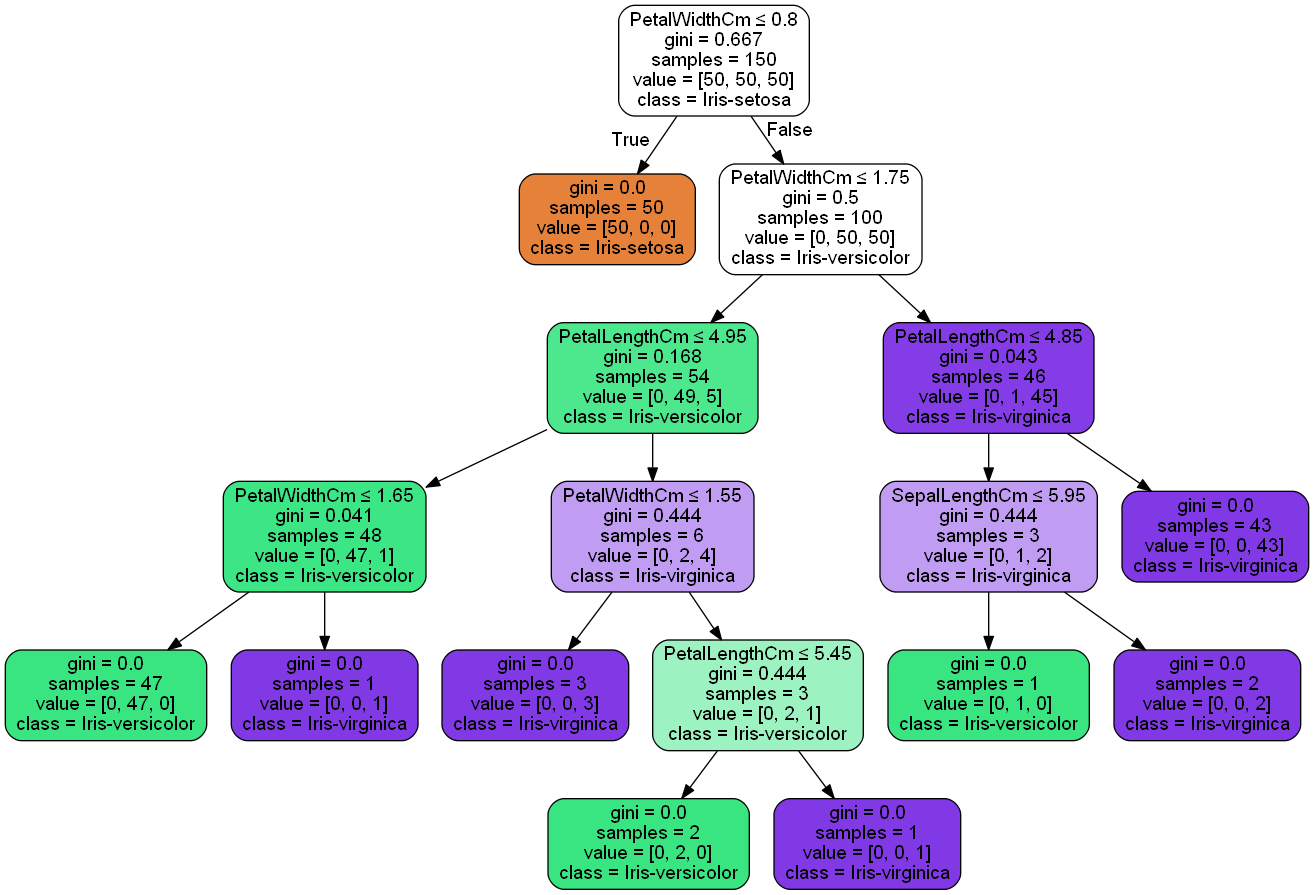

In [8]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data, feature_names=x.columns.values,class_names=np.unique(y), filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
x_in=np.array([[5,3.6,1.4,0.2]])
y_pred=reg.predict(x_in)
print("Pred:",y_pred)

Pred: ['Iris-setosa']


In [10]:
x_in1=np.array([[6.5,3.0,5.2,2.0]])

y_pred1=reg.predict(x_in1)
print("Pred:",y_pred1)

Pred: ['Iris-virginica']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [12]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2=dt.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Confusion Matrix :",confusion_matrix(y_test,y_pred2))

Confusion Matrix : [[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]


In [14]:
print("Report:",classification_report(y_test,y_pred2))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
print("Accuracy score:",accuracy_score(y_test,y_pred2))

Accuracy score: 0.9666666666666667
